In [1]:
import mysql.connector
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [71]:
# read dataset in pandas and then uplaoded from here to mysql so that i can use sql queries

In [72]:
# !pip install sqlalchemy pymysql


In [73]:
# from sqlalchemy import create_engine

# df = pd.read_csv("global_cancer_patients_2015_2024 (1).csv")

# engine = create_engine("mysql+pymysql://root:@localhost:3306/cancer_patients")

# df.to_sql('cancer_data', engine, index=False, if_exists='replace')


In [3]:
conn = mysql.connector.connect(host = "localhost", user = "root", password = "", database = "cancer_patients")

In [4]:
df = pd.read_sql_query("select * from cancer_data",conn)
df

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,...,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score,Age_Bin,Genetic_Risk_Level,Air_Pollution_Level,Alcohol_consumption_Level,smoking_level,Obesity_category
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,...,Stage III,62913.44,5.9,4.92,Senior (61-75),High Risk,Moderate,Very High,Low,Very High
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,...,Stage 0,12573.41,4.7,4.65,Young_adult,Low Risk,Moderate,Moderate,Moderate,High
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,...,Stage II,6984.33,7.1,5.84,Elderly (> 75),High Risk,Very High,Low,Moderate,Low
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,...,Stage I,67446.25,1.6,3.12,Young_adult,Low Risk,Moderate,Moderate,Moderate,Moderate
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,...,Stage III,77977.12,2.9,3.62,Middle Age (41-60),High Risk,Moderate,Low,High,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,...,Stage 0,71463.70,1.0,3.63,Elderly (> 75),Low Risk,High,Moderate,Moderate,Moderate
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,...,Stage I,49619.66,0.4,6.03,Young_adult,High Risk,Moderate,Moderate,Very High,Very High
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,...,Stage 0,5338.25,2.7,6.02,Senior (61-75),High Risk,Low,Very High,Moderate,Moderate
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,...,Stage IV,45100.47,7.5,6.54,Young_adult,Moderate Risk,High,Very High,Very High,Very High


# 1. Data Description 


| Column Name               | Description                                                                                                                | Data Type           | Example Values                                  |
| ------------------------- | -------------------------------------------------------------------------------------------------------------------------- | ------------------- | ----------------------------------------------- |
| **Country_Region**        | The country or region where the patient was registered/treated. Helps identify geographical cancer distribution trends.    | Categorical         | UK, China, Pakistan, Brazil, Australia          |
| **Year**                  | Year of diagnosis/treatment record (2014–2024). Useful for temporal analysis and trend visualization.                      | Numerical (Integer) | 2021, 2017, 2015                                |
| **Genetic_Risk**          | Represents hereditary cancer susceptibility level (scale value). Higher values indicate greater genetic risk.              | Numerical (Float)   | 6.4, 1.3, 7.4                                   |
| **Air_Pollution**         | Air pollution exposure index or pollution score in patient’s region. Used to evaluate environmental impact on cancer risk. | Numerical (Float)   | 2.8, 4.5, 7.9                                   |
| **Alcohol_Use**           | Alcohol consumption score/level of the patient or average regional consumption. Higher values indicate more usage.         | Numerical (Float)   | 9.5, 3.7, 2.8                                   |
| **Smoking**               | Measures smoking exposure/habit level. Higher scores imply more smoking history.                                           | Numerical (Float)   | 0.9, 3.9, 2.4                                   |
| **Obesity_Level**         | Indicates BMI/Obesity index. Higher values reflect greater obesity risk.                                                   | Numerical (Float)   | 8.7, 6.3, 0.1                                   |
| **Cancer_Type**           | Type of cancer diagnosed in the patient. Useful for category-wise comparison.                                              | Categorical         | Lung, Leukemia, Breast, Colon                   |
| **Cancer_Stage**          | Stage of cancer at diagnosis. Higher stage = advanced disease.                                                             | Categorical         | Stage 0, Stage I, Stage II, Stage III, Stage IV |
| **Treatment_Cost_USD**    | Total treatment expenditure in USD. Helpful for cost analysis and healthcare economics.                                    | Numerical (Float)   | 62913.44, 12573.41, 69844.33                    |
| **Survival_Years**        | Number of years the patient survived after diagnosis/treatment. Used for survival analysis.                                | Numerical (Float)   | 5.9, 4.7, 7.1                                   |
| **Target_Severity_Score** | Final severity score combining risk factors. Can be used as target variable for prediction models.                         | Numerical (Float)   | 4.92, 4.65, 5.84                                |


In [76]:
df.shape

(50000, 15)

In [77]:
df.head(5)

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

# 2. Feature Engineering:

### a. Age group column

In [249]:
# age_bin = "ALTER TABLE cancer_data ADD COLUMN Age_Bin VARCHAR(30)"
# cursor = conn.cursor()
# cursor.execute(age_bin)
# conn.commit()

In [256]:
# add_age_data = '''
#                 UPDATE cancer_data
#                 SET Age_bin = 
#                     CASE
#                         WHEN Age IS NULL THEN 'Unknown'
#                         WHEN Age BETWEEN 20 AND 40 THEN "Young_adult"
#                         WHEN Age BETWEEN 41 AND 60 THEN 'Middle Age (41-60)'
#                         WHEN Age BETWEEN 61 AND 75 THEN 'Senior (61-75)'
#                         WHEN Age > 75 THEN 'Elderly (> 75)'
#                         ELSE 'Other' 
#                     END
#                 WHERE 
#                     Age_Bin IS NULL
#                 '''

In [257]:
# cursor.execute(add_age_data)
# conn.commit()

In [263]:
# pd.read_sql_query("select age_bin from cancer_data",conn).sample(5)

,age_bin
41115,Senior (61-75)
39953,Elderly (> 75)
44405,Young_adult
22017,Young_adult
11452,Senior (61-75)


### b. Genetic risk severity column

In [264]:
# add_gen_risk = "ALTER TABLE cancer_data ADD COLUMN Genetic_Risk_Level VARCHAR(20)"
# cursor.execute(add_gen_risk)

In [268]:
# add_gen_risk_data = '''
#                     UPDATE cancer_data
#                     SET Genetic_Risk_Level = 
#                         CASE 
#                             WHEN Genetic_Risk IS NULL THEN "Unknown"
#                             WHEN Genetic_Risk BETWEEN 0 AND 2.5 THEN "Low Risk"
#                             WHEN Genetic_Risk BETWEEN 2.6 AND 5.0 THEN "Moderate Risk" 
#                             WHEN Genetic_Risk BETWEEN 5.1 AND 7.5 THEN "High Risk"
#                             WHEN Genetic_Risk BETWEEN 7.6 AND 10.0 THEN "Very High Risk"
#                             ELSE 'Other'
#                         END
#                     '''
# cursor.execute(add_gen_risk_data)
# conn.commit()                
                        

In [270]:
# pd.read_sql_query("select Genetic_Risk_Level from cancer_data",conn).sample(5)

,Genetic_Risk_Level
48006,High Risk
28192,Moderate Risk
43985,Low Risk
44623,Very High Risk
37397,High Risk


### c. Air Pollution severity column

In [271]:
# add_air_poll = "ALTER TABLE cancer_data ADD COLUMN Air_Pollution_Level VARCHAR(20)"
# cursor.execute(add_air_poll)

In [272]:
# add_air_poll_data = '''
#                     UPDATE cancer_data
#                     SET Air_Pollution_Level = 
#                         CASE 
#                             WHEN Air_Pollution IS NULL THEN "Unknown"
#                             WHEN Air_Pollution BETWEEN 0 AND 2.5 THEN "Low"
#                             WHEN Air_Pollution BETWEEN 2.6 AND 5.0 THEN "Moderate" 
#                             WHEN Air_Pollution BETWEEN 5.1 AND 7.5 THEN "High"
#                             WHEN Air_Pollution BETWEEN 7.6 AND 10.0 THEN "Very High"
#                             ELSE 'Other'
#                         END
#                     '''
# cursor.execute(add_air_poll_data)
# conn.commit()                
                        

In [273]:
# pd.read_sql_query("select Air_Pollution_Level from cancer_data",conn).sample(5)

,Air_Pollution_Level
24099,Very High
39449,Very High
48355,Very High
3737,High
7544,Low


### d. Alcohol consumption level column

In [274]:
# add_alcohol_consum = "ALTER TABLE cancer_data ADD COLUMN Alcohol_consumption_Level VARCHAR(20)"
# cursor.execute(add_alcohol_consum)

In [276]:
# add_alcohol_consum_data = '''
#                     UPDATE cancer_data
#                     SET Alcohol_consumption_Level = 
#                         CASE 
#                             WHEN Alcohol_Use IS NULL THEN "Unknown"
#                             WHEN Alcohol_Use BETWEEN 0 AND 2.5 THEN "Low"
#                             WHEN Alcohol_Use BETWEEN 2.6 AND 5.0 THEN "Moderate" 
#                             WHEN Alcohol_Use BETWEEN 5.1 AND 7.5 THEN "High"
#                             WHEN Alcohol_Use BETWEEN 7.6 AND 10.0 THEN "Very High"
#                             ELSE 'Other'
#                         END
#                     '''
# cursor.execute(add_alcohol_consum_data)
# conn.commit()                
                        

In [277]:
# pd.read_sql_query("select Alcohol_consumption_Level from cancer_data",conn).sample(5)

,Alcohol_consumption_Level
45778,High
45964,Low
26810,Moderate
28509,Low
26443,Low


### e. Smoking level column 

In [279]:
# add_smoking_level = "ALTER TABLE cancer_data ADD COLUMN smoking_level VARCHAR(20)"
# cursor.execute(add_smoking_level)

In [282]:
# add_smoking_level_data = '''
#                     UPDATE cancer_data
#                     SET smoking_level = 
#                         CASE 
#                             WHEN Smoking IS NULL THEN "Unknown"
#                             WHEN Smoking BETWEEN 0 AND 2.5 THEN "Low"
#                             WHEN Smoking BETWEEN 2.6 AND 5.0 THEN "Moderate" 
#                             WHEN Smoking BETWEEN 5.1 AND 7.5 THEN "High"
#                             WHEN Smoking BETWEEN 7.6 AND 10.0 THEN "Very High"
#                             ELSE 'Other'
#                         END
#                     '''
# cursor.execute(add_smoking_level_data)
# conn.commit()                
                        

In [283]:
# pd.read_sql_query("select smoking_level from cancer_data",conn).sample(5)

,smoking_level
24564,High
107,Very High
17031,High
40017,Low
36339,Very High


### f. Obesity category column

In [286]:
# add_Obesity_category = "ALTER TABLE cancer_data ADD COLUMN Obesity_category VARCHAR(20)"
# cursor.execute(add_Obesity_category)

In [287]:
# add_Obesity_category_data = '''
#                     UPDATE cancer_data
#                     SET Obesity_category = 
#                         CASE 
#                             WHEN Obesity_Level IS NULL THEN "Unknown"
#                             WHEN Obesity_Level BETWEEN 0 AND 2.5 THEN "Low"
#                             WHEN Obesity_Level BETWEEN 2.6 AND 5.0 THEN "Moderate" 
#                             WHEN Obesity_Level BETWEEN 5.1 AND 7.5 THEN "High"
#                             WHEN Obesity_Level BETWEEN 7.6 AND 10.0 THEN "Very High"
#                             ELSE 'Other'
#                         END
#                     '''
# cursor.execute(add_Obesity_category_data )
# conn.commit()                

In [288]:
# pd.read_sql_query("select Obesity_category from cancer_data",conn).sample(5)

,Obesity_category
39296,Very High
18169,Low
31382,Moderate
40295,Very High
34426,Moderate


# 3. Data Analysis:

## a. Univariate Analysis

In [5]:
def num_cat_plots(df, col):

    # numerical column
    if pd.api.types.is_numeric_dtype(df[col]):
        print()
        print("Numerical column Analysis : -\n")
        print()
        plt.figure(figsize=(17,5))
        sns.set_style("whitegrid")
        sns.set_palette("Set2")

        plt.subplot(1,3,1)
        sns.histplot(x=df[col])
        plt.title("Histogram")

        plt.subplot(1,3,2)
        sns.kdeplot(x=df[col],fill=True)
        plt.title("KDE Plot")

        plt.subplot(1,3,3)
        sns.boxplot(x=df[col])
        plt.title("Boxplot")

        plt.show()
    else:
        print()
        # Categorical column
        print("Categorical column Analysis : -\n")

        #count plot
        plt.figure(figsize=(8,5))
        sns.countplot(data=df, x=col)
        plt.title(f"Count of different {col}")
        plt.show()

         # Pie chart
        df[col].value_counts().plot.pie(
                                            autopct='%1.1f%%',
                                            figsize=(6,6),
                                            startangle=90,
                                            shadow=True,
                                            explode=[0.05]*df[col].nunique(),
                                            ylabel=''     
                                        )
        plt.title("Distribution of Alcohol Use")
        plt.show()



### i. Numerical column Analysis

In [10]:
def stats (data, col):

    # null values
    print("Null values are : ",pd.read_sql_query(f"select * from cancer_data where {col} is null",conn).shape[0])

    # max value
    max_query = f"select max({col}) AS max_val from {data}"
    max_df = pd.read_sql_query(max_query,conn)
    max_value = max_df["max_val"].iloc[0]
    print(f"Maximum value of {col} is : ", max_value)
    
    # min value
    min_query = f"select min({col}) AS min_val from {data}"
    min_df = pd.read_sql_query(min_query,conn)
    min_value = min_df["min_val"].iloc[0]
    print(f"Minimum value of {col} is : ", min_value)

    # average value
    avg_query = f"select avg({col}) AS avg_val from {data}"
    avg_df = pd.read_sql_query(avg_query,conn)
    avg_value = avg_df["avg_val"].iloc[0]
    print(f"Average value of {col} is : ", avg_value)

    # Mode value
    mode_query = f"select {col} AS mode_val, COUNT(*) AS count from cancer_data GROUP BY {col} ORDER BY count Desc LIMIT 1"
    mode_df = pd.read_sql_query(mode_query,conn)
    mode_val = mode_df["mode_val"].iloc[0]
    print(f"Mode value of {col} is :",mode_val)

    # median value
    median_query = f"""
                        WITH Row_rank AS (
                        SELECT 
                            {col},
                            ROW_NUMBER() OVER(ORDER BY {col}) AS rn,
                            COUNT({col}) OVER() AS total_count
                        FROM 
                            cancer_data
                        WHERE {col} IS NOT NULL
                        )
                        SELECT
                            AVG({col}) AS Median_value
                        FROM Row_rank
                        WHERE rn = CEIL(total_count/2) OR FLOOR(total_count/2)+1;
        
                        """
    median_df = pd.read_sql_query(median_query,conn)
    median_val = median_df["Median_value"].iloc[0]
    print(f"Median of {col} is :",median_val) 

    #  Standard Deviation:
    std_df = pd.read_sql_query(f"select std({col}) as std_value from cancer_data",conn)
    std_val = std_df["std_value"].iloc[0].item()
    print(f"Standard deviation of {col} is: ",std_val)


#### Age :

In [11]:
Age = pd.read_sql_query("select Age from cancer_data Group by Age order by Age",conn)

In [12]:
stats("cancer_data","Age")

Null values are :  0
Maximum value of Age is :  89
Minimum value of Age is :  20
Average value of Age is :  54.4215
Mode value of Age is : 77
Median of Age is : 54.4215
Standard deviation of Age is:  20.2242



Numerical column Analysis : -




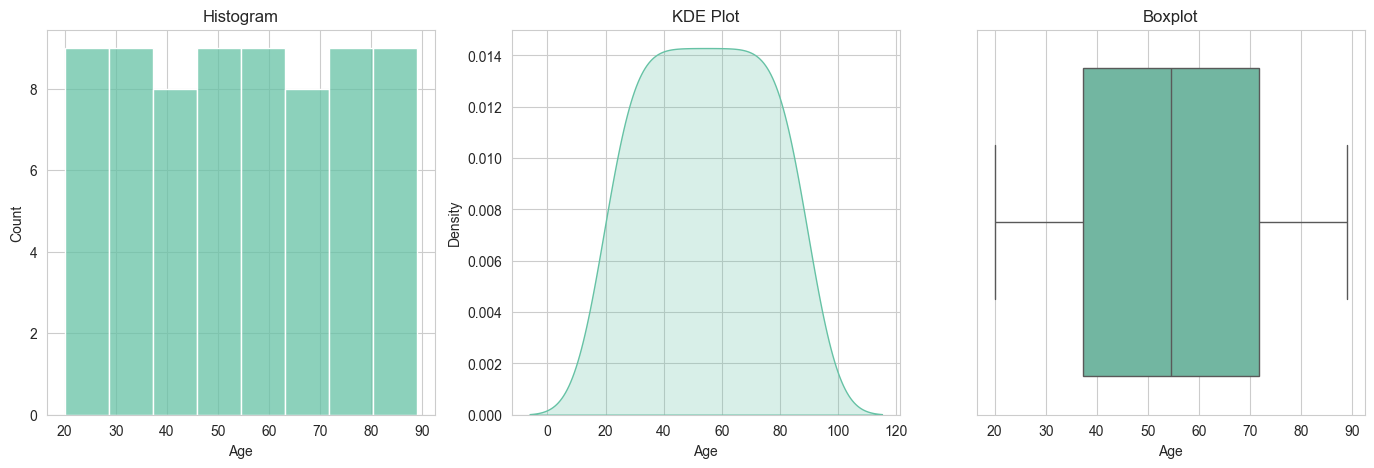

In [13]:
num_cat_plots(Age, "Age")

### Genetic_Risk

In [14]:
Genetic_Risk = pd.read_sql_query("select Genetic_Risk from cancer_data ",conn)

In [15]:
stats("cancer_data", "Genetic_Risk")

Null values are :  0
Maximum value of Genetic_Risk is :  10.0
Minimum value of Genetic_Risk is :  0.0
Average value of Genetic_Risk is :  5.0016979999999975
Mode value of Genetic_Risk is : 8.8
Median of Genetic_Risk is : 5.001697999999846
Standard deviation of Genetic_Risk is:  2.885743667894987


In [16]:
# skewness in genetic risk
print("Skewness in genetic risk is : ",df["Genetic_Risk"].skew()) # very lean negatively skewed

Skewness in genetic risk is :  -0.0029504311434190755



Numerical column Analysis : -




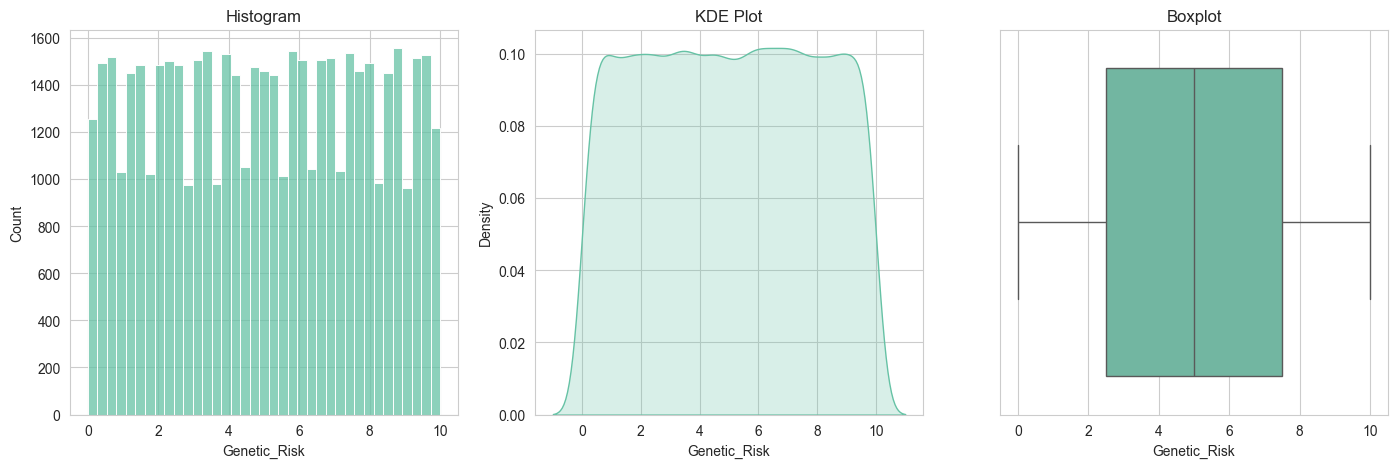

In [17]:
num_cat_plots(df,"Genetic_Risk")

#### Air_Pollution

In [18]:
Air_Pollution = pd.read_sql_query("select Air_Pollution from cancer_data ",conn)

In [19]:
stats("cancer_data","Air_Pollution")

Null values are :  0
Maximum value of Air_Pollution is :  10.0
Minimum value of Air_Pollution is :  0.0
Average value of Air_Pollution is :  5.01012600000003
Mode value of Air_Pollution is : 0.8
Median of Air_Pollution is : 5.010125999999781
Standard deviation of Air_Pollution is:  2.8883704859529455


In [20]:
# skewness in Air Pollution
print("Skewness in Air_Pollution is : ",df["Air_Pollution"].skew()) 

Skewness in Air_Pollution is :  0.0023347656441817057



Numerical column Analysis : -




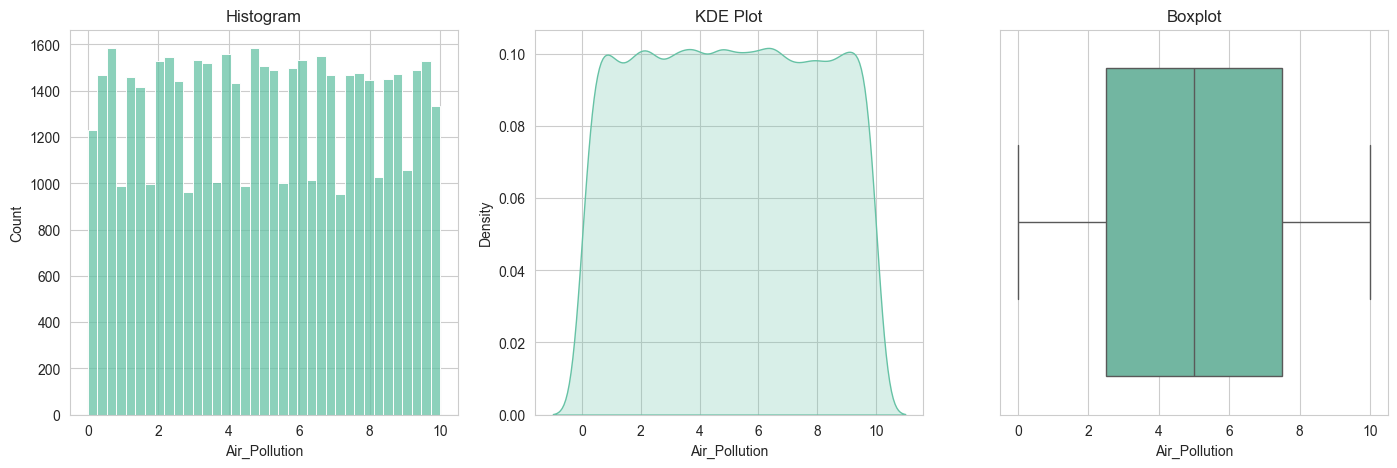

In [21]:
num_cat_plots(df,"Air_Pollution")

### Alcohol_Use

In [22]:
Alcohol_Use = pd.read_sql_query("select Alcohol_Use from cancer_data ",conn)

In [23]:
stats("cancer_data","Alcohol_Use")

Null values are :  0
Maximum value of Alcohol_Use is :  10.0
Minimum value of Alcohol_Use is :  0.0
Average value of Alcohol_Use is :  5.010879999999991
Mode value of Alcohol_Use is : 6.8
Median of Alcohol_Use is : 5.010879999999788
Standard deviation of Alcohol_Use is:  2.888739798874239


In [24]:
# skewness in Alcohol use
print("Skewness in Alcohol_Use is : ",df["Alcohol_Use"].skew()) 

Skewness in Alcohol_Use is :  -0.00801540518641772



Numerical column Analysis : -




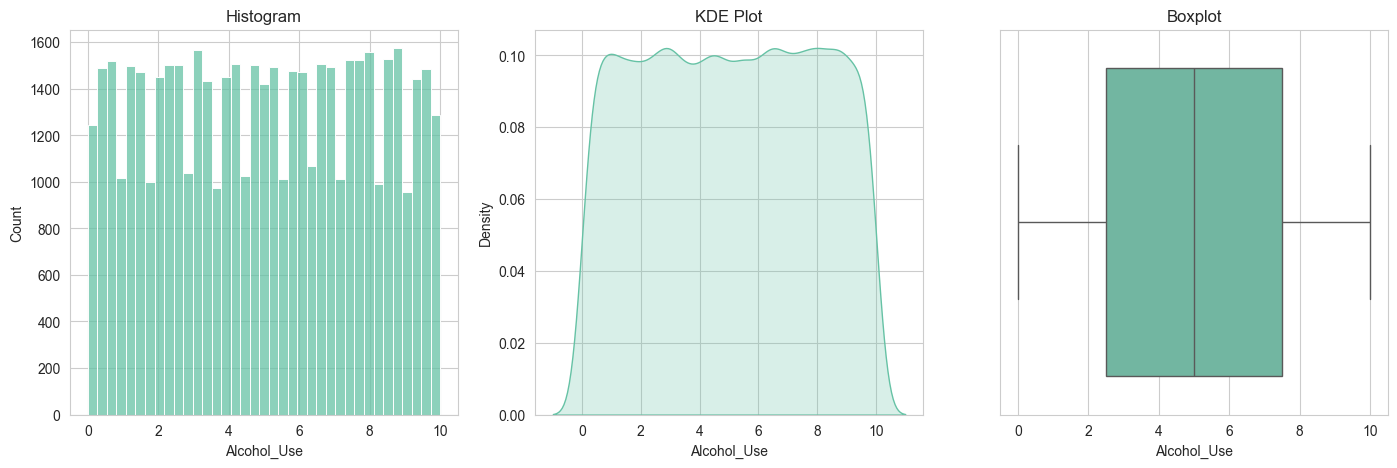

In [25]:
num_cat_plots(df,"Alcohol_Use")

### Smoking

In [26]:
Smoking = pd.read_sql_query("select Smoking from cancer_data ",conn)

In [27]:
stats("cancer_data", "Smoking")

Null values are :  0
Maximum value of Smoking is :  10.0
Minimum value of Smoking is :  0.0
Average value of Smoking is :  4.989825999999987
Mode value of Smoking is : 2.2
Median of Smoking is : 4.989825999999813
Standard deviation of Smoking is:  2.8815499110242624


In [28]:
# skewness in smoking
print("Skewness in Smoking is : ",df["Smoking"].skew()) 

Skewness in Smoking is :  0.005871561673564072



Numerical column Analysis : -




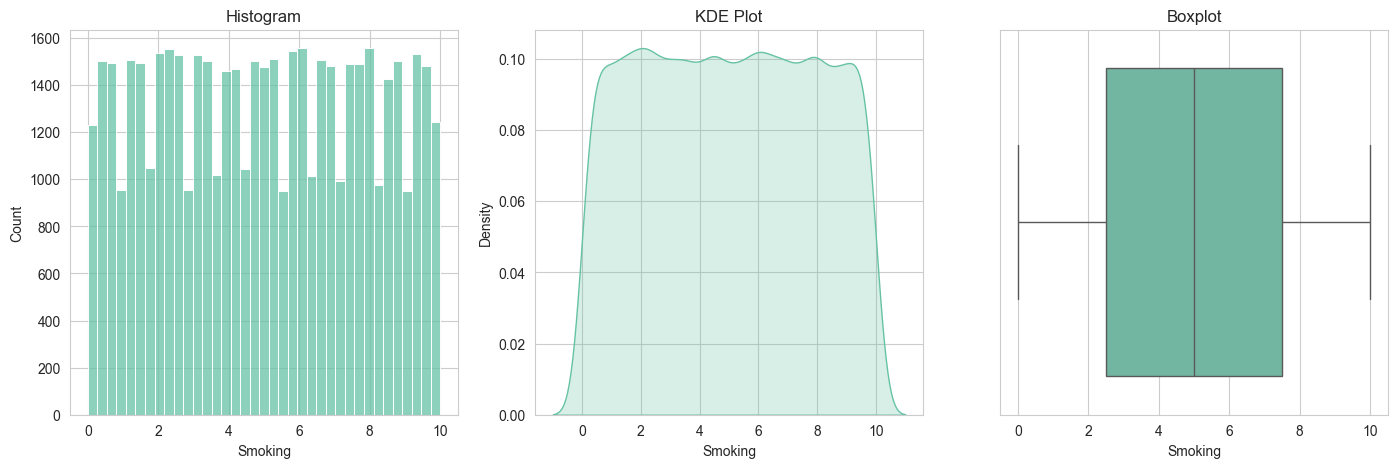

In [29]:
num_cat_plots(df,"Smoking")

### Obesity 

In [30]:
Obesity_Level  = pd.read_sql_query("select Obesity_Level from cancer_data ",conn)


In [31]:
stats ("cancer_data", "Obesity_Level")


Null values are :  0
Maximum value of Obesity_Level is :  10.0
Minimum value of Obesity_Level is :  0.0
Average value of Obesity_Level is :  4.991175999999967
Mode value of Obesity_Level is : 8.3
Median of Obesity_Level is : 4.99117599999981
Standard deviation of Obesity_Level is:  2.89447510561483


In [32]:
# skewness in Obesity_Level
print("Skewness in Obesity_Level is : ",df["Obesity_Level"].skew()) 

Skewness in Obesity_Level is :  0.0019188460646087503



Numerical column Analysis : -




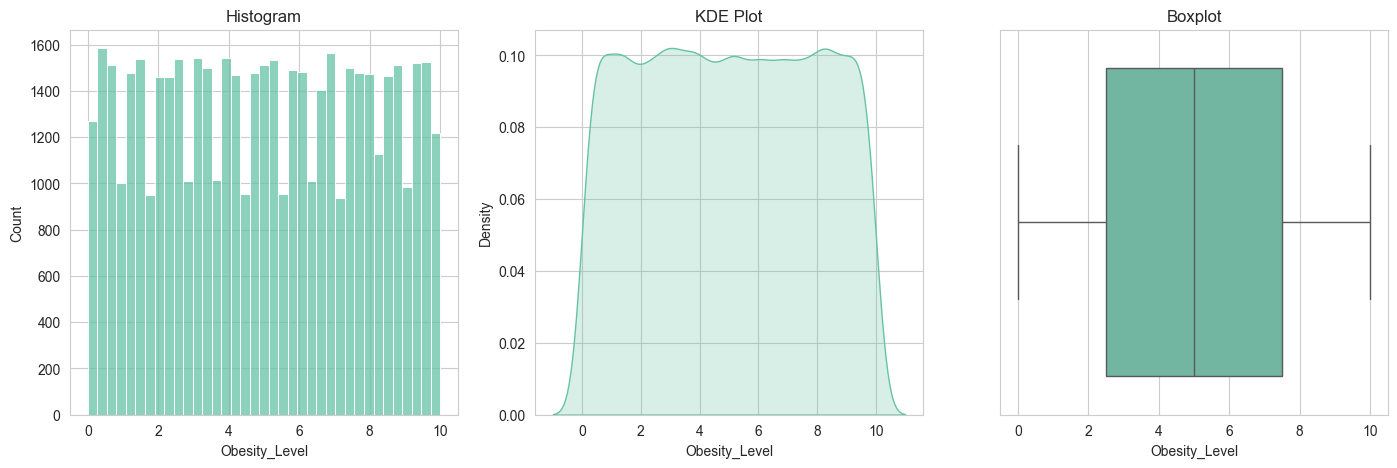

In [33]:
num_cat_plots(df,"Obesity_Level")

### Survival_Years

In [34]:
Survival_Years  = pd.read_sql_query("select Survival_Years from cancer_data ",conn)

In [35]:
stats("cancer_data","Survival_Years")

Null values are :  0
Maximum value of Survival_Years is :  10.0
Minimum value of Survival_Years is :  0.0
Average value of Survival_Years is :  5.006462000000019
Mode value of Survival_Years is : 4.6
Median of Survival_Years is : 5.006461999999859
Standard deviation of Survival_Years is:  2.8833066508014706


In [36]:
# skewness in Survival_Years
print("Skewness in Survival_Years is : ",df["Survival_Years"].skew()) 

Skewness in Survival_Years is :  0.0030232447521046173



Numerical column Analysis : -




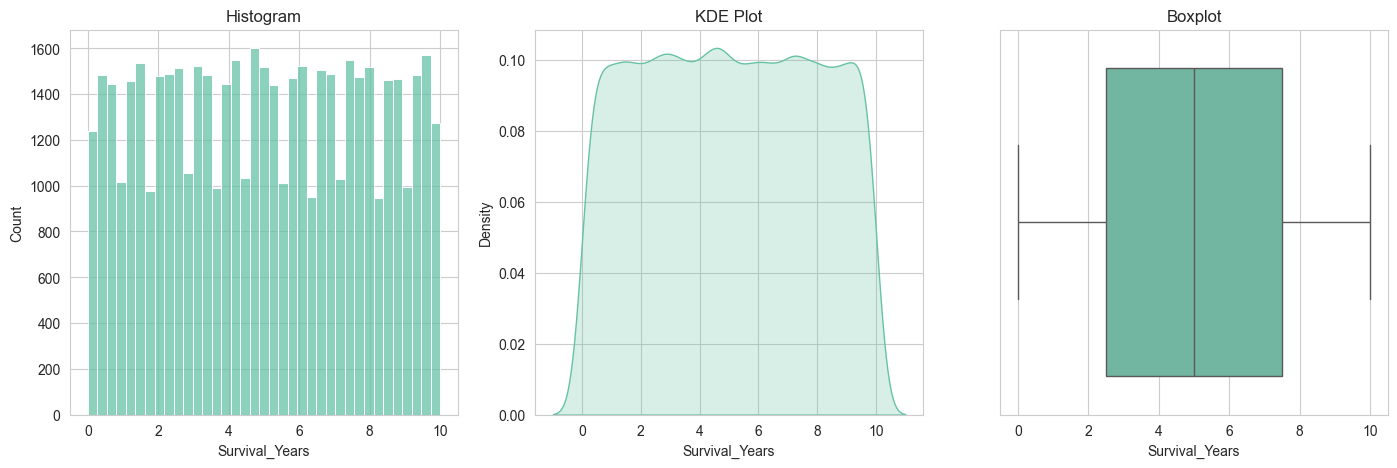

In [37]:
num_cat_plots(df,"Survival_Years")

### Target_Severity_Score

In [38]:
Target_Severity_Score  = pd.read_sql_query("select Target_Severity_Score from cancer_data ",conn)

In [39]:
stats("cancer_data","Target_Severity_Score")

Null values are :  0
Maximum value of Target_Severity_Score is :  9.16
Minimum value of Target_Severity_Score is :  0.9
Average value of Target_Severity_Score is :  4.951207400000046
Mode value of Target_Severity_Score is : 4.99
Median of Target_Severity_Score is : 4.951207400000028
Standard deviation of Target_Severity_Score is:  1.1996647832562353


In [40]:
# skewness in Target_Severity_Score
print("Skewness in Target_Severity_Score is : ",df["Target_Severity_Score"].skew()) 

Skewness in Target_Severity_Score is :  -0.0024532680326027514



Numerical column Analysis : -




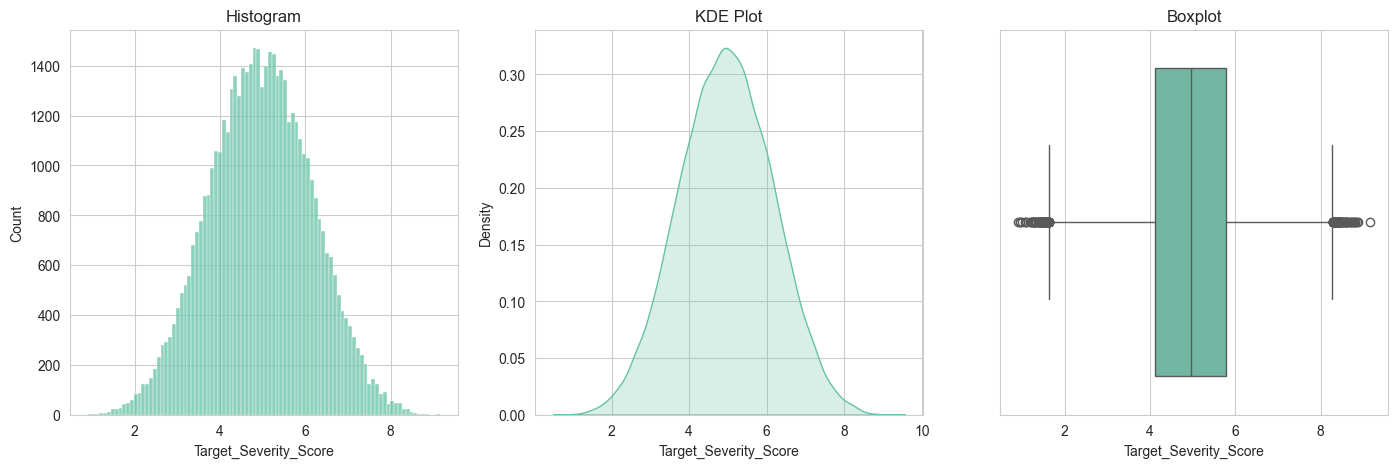

In [41]:
num_cat_plots(df,"Target_Severity_Score")

### Treatment_Cost_USD

In [59]:
Treatment_Cost_USD  = pd.read_sql_query("select Treatment_Cost_USD from cancer_data ",conn)

In [60]:
stats("cancer_data", "Treatment_Cost_USD")

Null values are :  0
Maximum value of Treatment_Cost_USD is :  99999.84
Minimum value of Treatment_Cost_USD is :  5000.05
Average value of Treatment_Cost_USD is :  52467.29823859989
Mode value of Treatment_Cost_USD is : 29582.11
Median of Treatment_Cost_USD is : 52467.298238599746
Standard deviation of Treatment_Cost_USD is:  27362.955745317417


In [61]:
# skewness in Target_Severity_Score
print("Skewness in Treatment_Cost_USD is : ",df["Treatment_Cost_USD"].skew()) 

Skewness in Treatment_Cost_USD is :  0.004063624207520141



Numerical column Analysis : -




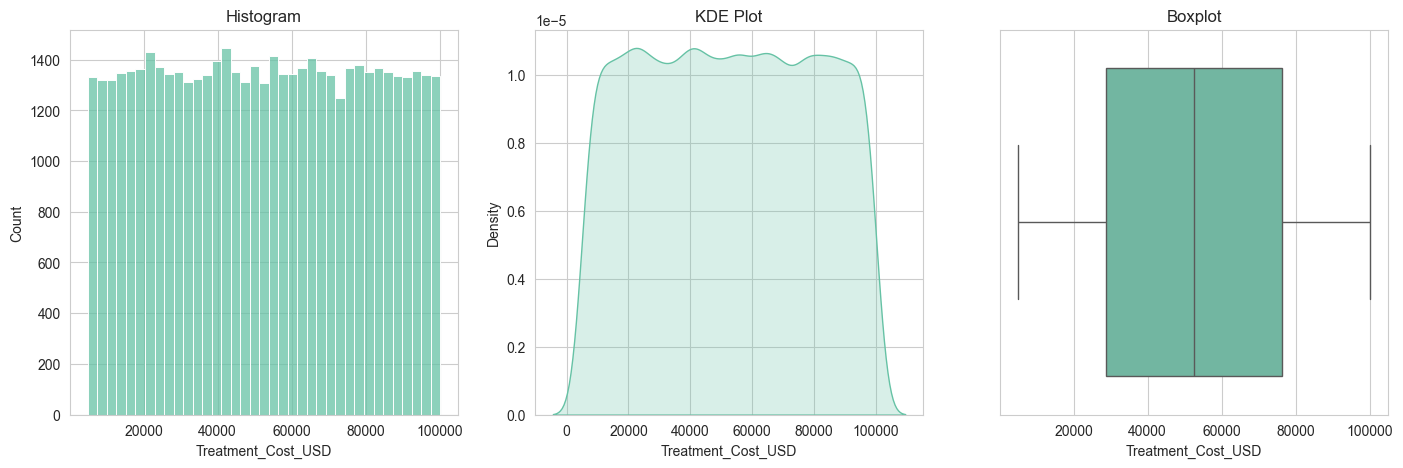

In [62]:
num_cat_plots(df,"Treatment_Cost_USD" )

### ii. Categorical column

In [42]:
# count of cancer cases col wise
def stats_cat(data, col):
    null_counts = pd.read_sql_query(f"SELECT COUNT(*) AS count From cancer_data where {col} is null",conn)["count"].iloc[0]
    count = pd.read_sql_query(f"SELECT {col}, COUNT(*) AS count From cancer_data GROUP BY {col} ORDER BY count DESC",conn).reset_index(drop = True)
    print(f"Null values in {col} are : ",null_counts)
    print(f"Count of cancer case {col} wise :")
    return count

#### Gender :

In [43]:
Gender = pd.read_sql_query("SELECT Gender FROM cancer_data",conn)
Gender

,Gender
0,Male
1,Male
2,Male
3,Male
4,Female
...,...
49995,Male
49996,Female
49997,Male
49998,Male


In [44]:
stats_cat("cancer_data","Gender")

Null values in Gender are :  0
Count of cancer case Gender wise :


,Gender,count
0,Male,16796
1,Female,16709
2,Other,16495


In [45]:
print("Gender with most cancer cases is : ",pd.read_sql_query("SELECT Gender, COUNT(*) AS count From cancer_data GROUP BY Gender ORDER BY count DESC LIMIT 1",conn)["Gender"].iloc[0])

Gender with most cancer cases is :  Male



Categorical column Analysis : -



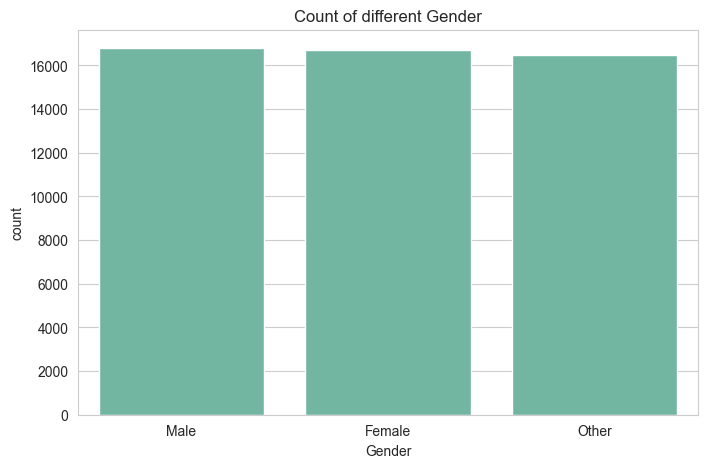

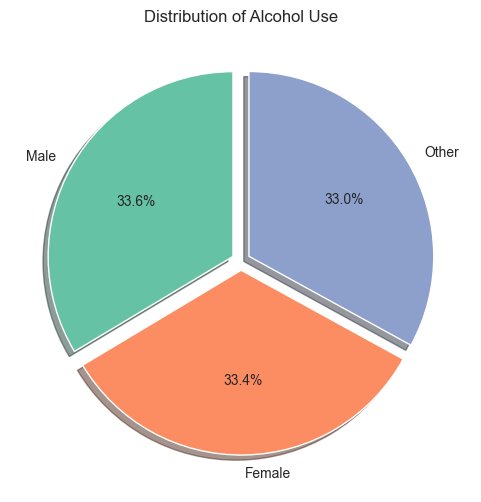

In [46]:
num_cat_plots(df,"Gender")

### Year

In [47]:
count = stats_cat("cancer_data","Year")
count

Null values in Year are :  0
Count of cancer case Year wise :


,Year,count
0,2016,5094
1,2020,5079
2,2019,5065
3,2017,5037
4,2015,5012
5,2024,4994
6,2021,4967
7,2018,4936
8,2023,4935
9,2022,4881


In [48]:
print("year with highest number of cases reported:")
pd.read_sql_query("SELECT Year,COUNT(*) AS count FROM cancer_data GROUP BY Year ORDER BY count DESC LIMIT 1",conn)

year with highest number of cases reported:


,Year,count
0,2016,5094


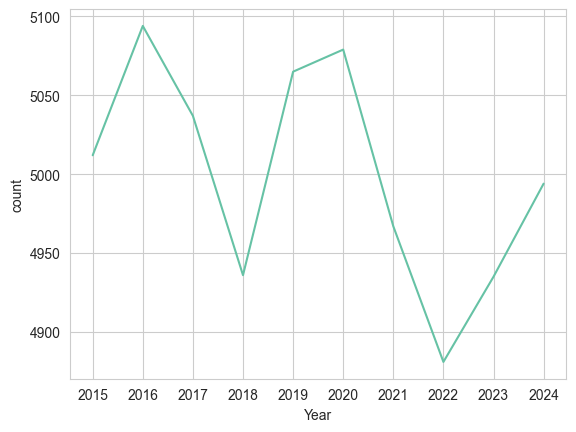

In [49]:
sns.lineplot(data = count, x = "Year", y= "count")
plt.xticks(count["Year"].unique())
plt.show()

In [50]:
print("Difference between highest and lowest case count: ")
diff_query = """
                WITH year_count AS (
                SELECT Year, COUNT(*) as count
                FROM cancer_data
                GROUP BY Year
                )
                SELECT MAX(count) - MIN(count) as diff 
                FROM year_count
             """
pd.read_sql_query(diff_query,conn).iloc[0].item()

Difference between highest and lowest case count: 


213

In [51]:
## cumulative avg cases
cum_avg_cases = """
                    WITH year_counts AS (
                    SELECT Year, COUNT(*) AS case_count
                    FROM cancer_data
                    Group by Year
                    ORDER BY Year )

                    SELECT *,
                    AVG(case_count) OVER(ORDER BY Year ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW ) AS cumulative_case_count
                    FROM year_counts
                    ORDER BY Year
                """
cum_avg_year = pd.read_sql_query(cum_avg_cases,conn)
cum_avg_year

,Year,case_count,cumulative_case_count
0,2015,5012,5012.0000
1,2016,5094,5053.0000
2,2017,5037,5047.6667
3,2018,4936,5019.7500
4,2019,5065,5028.8000
5,2020,5079,5037.1667
6,2021,4967,5027.1429
7,2022,4881,5008.8750
8,2023,4935,5000.6667
9,2024,4994,5000.0000


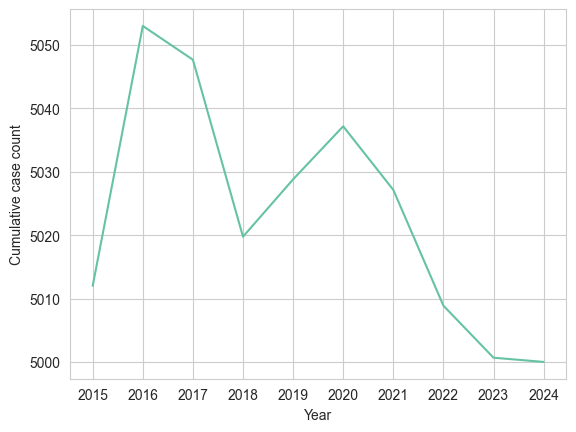

In [52]:
sns.lineplot(data =cum_avg_year, x = "Year", y = "cumulative_case_count")
plt.ylabel("Cumulative case count")
plt.xticks(cum_avg_year["Year"].unique())
plt.show()

In [53]:
# moving avg for 3 years
moving_avg_query = """
                    WITH year_counts AS (
                    SELECT Year, COUNT(*) AS case_count
                    FROM cancer_data
                    Group by Year
                    ORDER BY Year )
                    
                    SELECT *,
                    AVG(case_count) OVER(ORDER BY Year ROWS BETWEEN 2 PRECEDING AND CURRENT ROW) AS moving_avg_case_count
                    FROM year_counts
                    ORDER BY Year
                    """
moving_avg_year = pd.read_sql_query(moving_avg_query,conn)
moving_avg_year

,Year,case_count,moving_avg_case_count
0,2015,5012,5012.0000
1,2016,5094,5053.0000
2,2017,5037,5047.6667
3,2018,4936,5022.3333
4,2019,5065,5012.6667
5,2020,5079,5026.6667
6,2021,4967,5037.0000
7,2022,4881,4975.6667
8,2023,4935,4927.6667
9,2024,4994,4936.6667


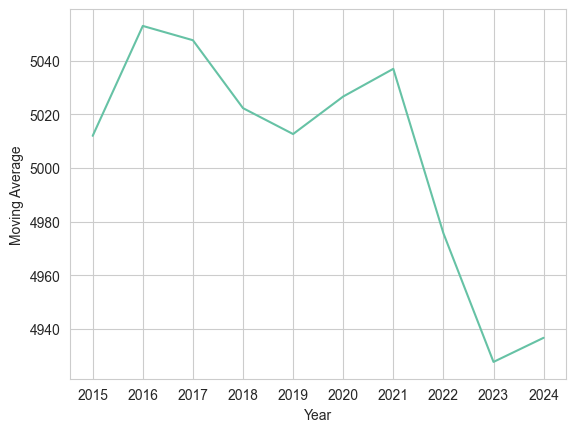

In [54]:
sns.lineplot(data =moving_avg_year, x = "Year", y = "moving_avg_case_count")
plt.xticks(cum_avg_year["Year"].unique())
plt.ylabel("Moving Average")
plt.show()

### Country_Region

In [65]:
Country_Region = pd.read_sql_query("select Country_Region from cancer_data",conn)

In [64]:
stats_cat("cancer_data","Country_Region")

Null values in Country_Region are :  0
Count of cancer case Country_Region wise :


,Country_Region,count
0,Australia,5092
1,UK,5060
2,USA,5060
3,India,5040
4,Germany,5024
5,Russia,5017
6,Brazil,5004
7,Pakistan,4926
8,China,4913
9,Canada,4864



Categorical column Analysis : -



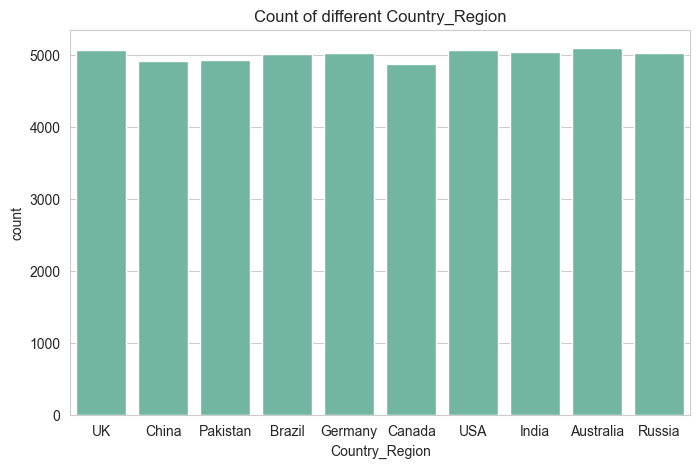

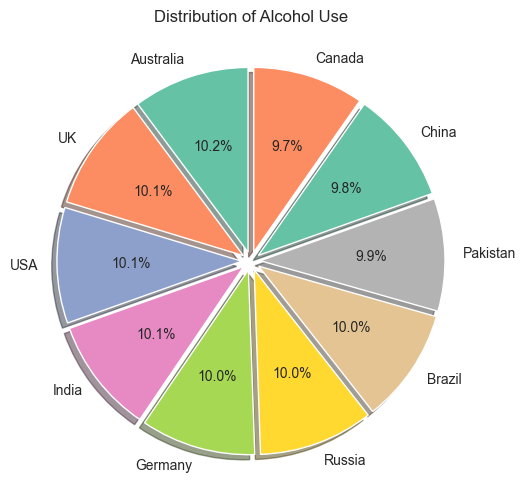

In [66]:
num_cat_plots(df,"Country_Region")

### Cancer_Stage

In [69]:
Cancer_Stage = pd.read_sql_query("select Cancer_Stage from cancer_data",conn)

In [71]:
stats_cat('cancer_data',"Cancer_Stage")

Null values in Cancer_Stage are :  0
Count of cancer case Cancer_Stage wise :


,Cancer_Stage,count
0,Stage II,10124
1,Stage I,10046
2,Stage III,10008
3,Stage IV,9933
4,Stage 0,9889



Categorical column Analysis : -



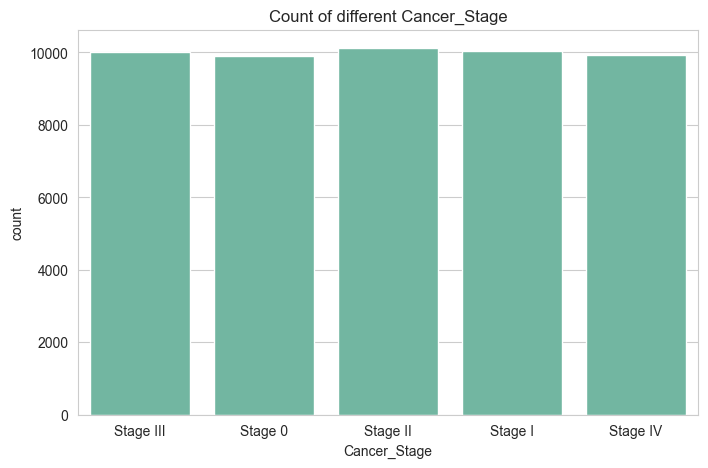

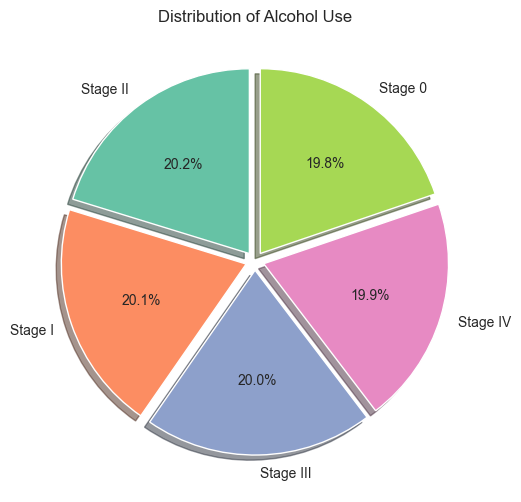

In [72]:
num_cat_plots(df,"Cancer_Stage")

### Age_Bin

In [74]:
Age_Bin = pd.read_sql_query("select Age_Bin from cancer_data",conn)

In [75]:
stats_cat("cancer_data","Age_Bin")

Null values in Age_Bin are :  0
Count of cancer case Age_Bin wise :


,Age_Bin,count
0,Young_adult,15129
1,Middle Age (41-60),14162
2,Senior (61-75),10695
3,Elderly (> 75),10014



Categorical column Analysis : -



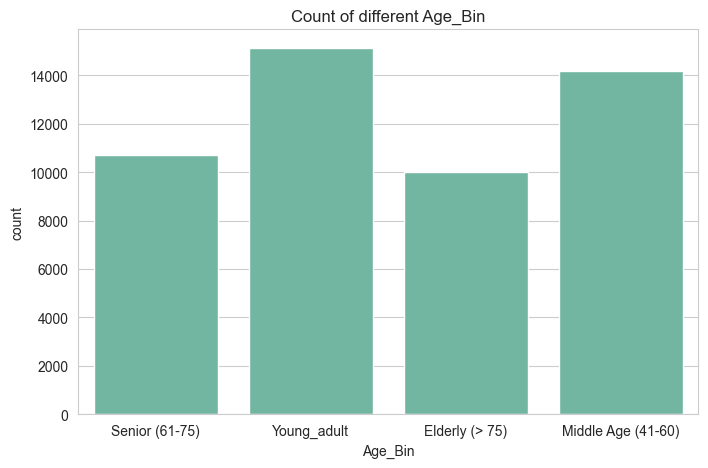

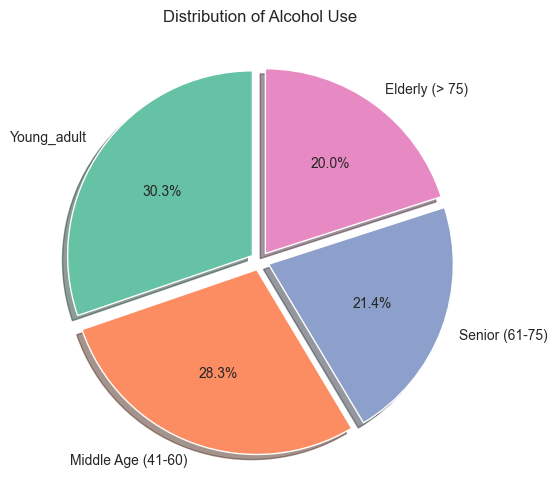

In [76]:
num_cat_plots(df,"Age_Bin")

### Risk Factors
Genetic_Risk_Level	

Air_Pollution_Level

Alcohol_consumption_Level	

smoking_level	

Obesity_category

Null values in Genetic_Risk_Level are :  0
Count of cancer case Genetic_Risk_Level wise :

Categorical column Analysis : -



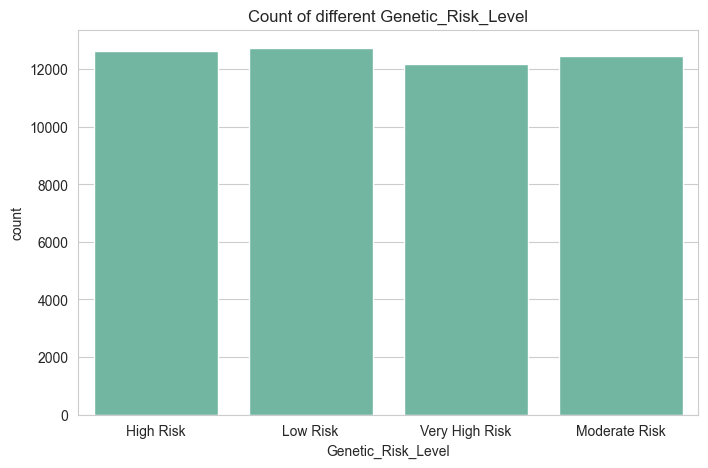

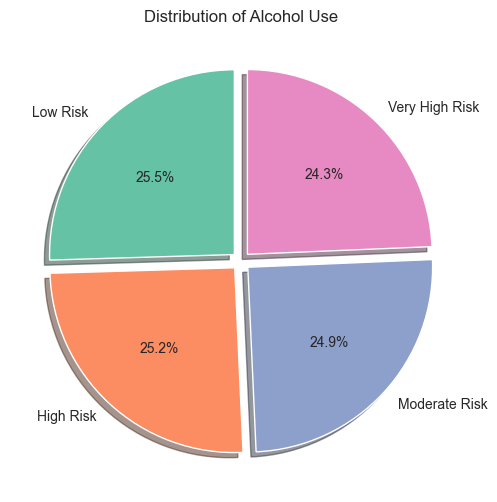

Null values in Air_Pollution_Level are :  0
Count of cancer case Air_Pollution_Level wise :

Categorical column Analysis : -



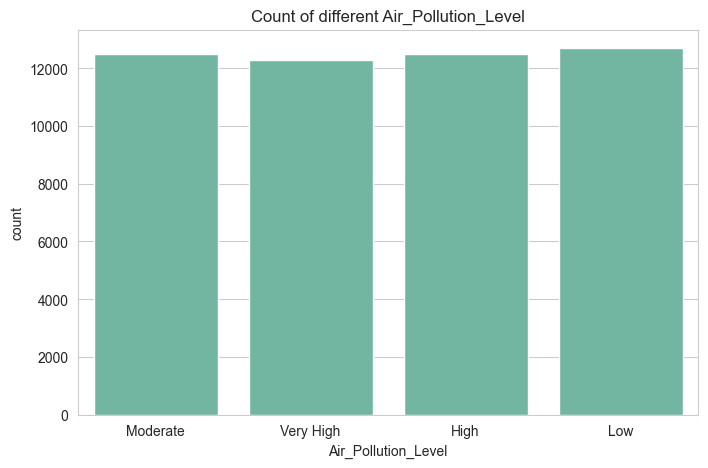

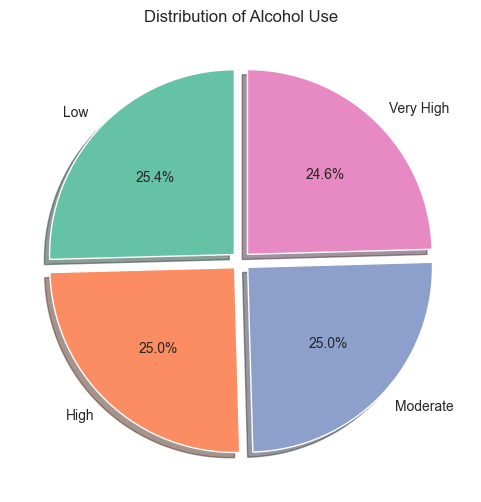

Null values in Alcohol_consumption_Level are :  0
Count of cancer case Alcohol_consumption_Level wise :

Categorical column Analysis : -



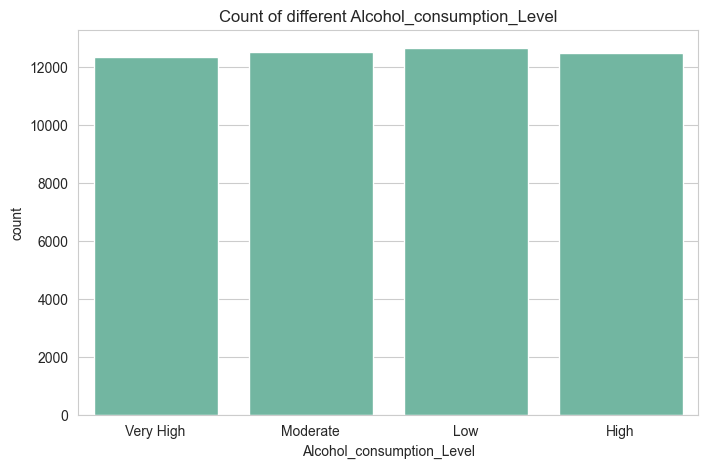

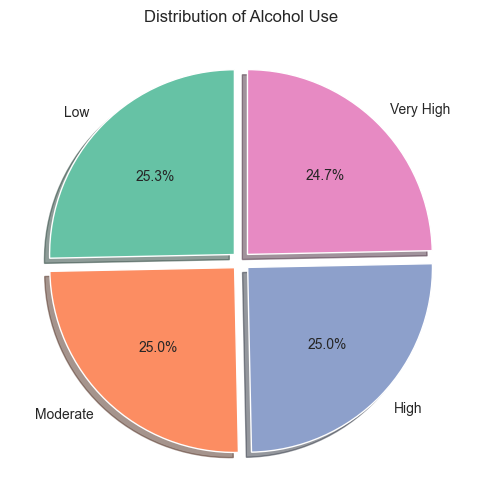

Null values in smoking_level are :  0
Count of cancer case smoking_level wise :

Categorical column Analysis : -



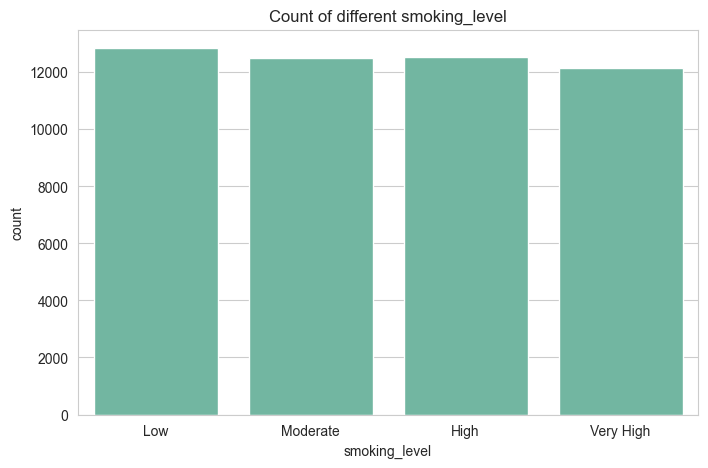

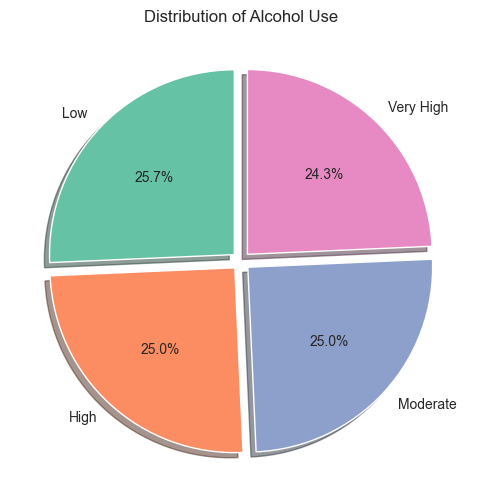

Null values in Obesity_category are :  0
Count of cancer case Obesity_category wise :

Categorical column Analysis : -



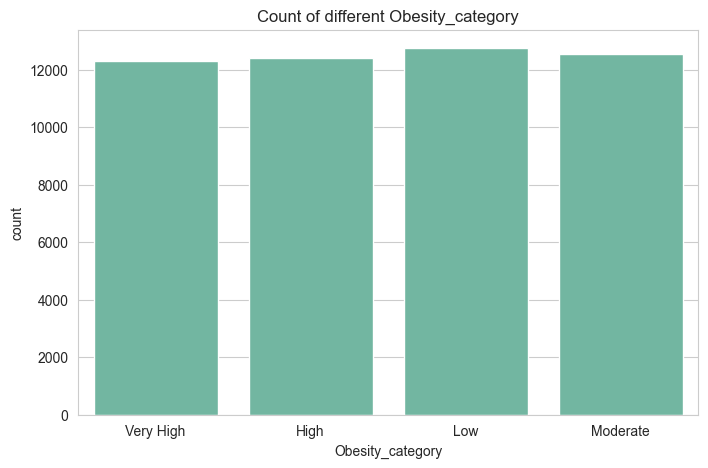

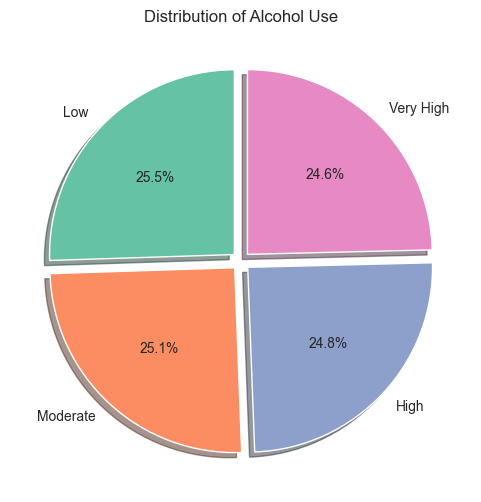

In [82]:
risk_factors_bins = ["Genetic_Risk_Level", "Air_Pollution_Level", "Alcohol_consumption_Level", "smoking_level", "Obesity_category"]
for i in risk_factors_bins:
    stats_cat("cancer_data", i)
    num_cat_plots(df, i)
    

## b. Bivariate Analysis 

### Age - Gender

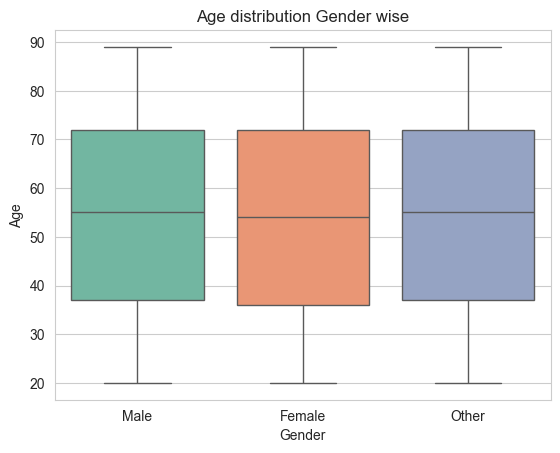

In [133]:
sns.boxplot(data = df, x = "Gender", y = "Age", hue = "Gender")
plt.title("Age distribution Gender wise")
plt.show()

### Gender - Smoking level

In [122]:
def patients_count(data, col1 , col2):
    query = f"select {col1} , {col2} ,  count(*) as Count from {data} group by {col1} , {col2} order by Count desc"
    return pd.read_sql_query(query , conn)

In [123]:
data = "cancer_data"
patients_count(data , "Gender", "smoking_level")

,Gender,smoking_level,Count
0,Male,Low,4386
1,Female,Moderate,4268
2,Other,Low,4235
3,Female,Low,4224
4,Male,High,4210
5,Female,High,4173
6,Other,High,4130
7,Other,Moderate,4123
8,Male,Very High,4102
9,Male,Moderate,4098


### Gender - Alcohol consumption level

In [124]:
patients_count(data , "Gender", "Alcohol_consumption_Level")

,Gender,Alcohol_consumption_Level,Count
0,Male,Low,4334
1,Female,Moderate,4242
2,Female,Low,4237
3,Male,Very High,4178
4,Other,High,4177
5,Female,High,4165
6,Male,High,4153
7,Other,Moderate,4133
8,Male,Moderate,4131
9,Other,Very High,4097


### Gender - Obesity_category


In [161]:
result = patients_count(data , "Gender", "Obesity_category").sort_values(by = ["Gender","Count"], ascending = False)
result

,Gender,Obesity_category,Count
4,Other,Low,4211
7,Other,Moderate,4136
9,Other,Very High,4116
11,Other,High,4032
0,Male,Low,4292
2,Male,High,4245
3,Male,Moderate,4218
10,Male,Very High,4041
1,Female,Low,4251
5,Female,Moderate,4192


In [163]:
pivot_df = result.pivot(index='Gender', columns='Obesity_category', values='Count')
pivot_df

Obesity_category,High,Low,Moderate,Very High
Gender,,,,
Female,4119,4251,4192,4147
Male,4245,4292,4218,4041
Other,4032,4211,4136,4116


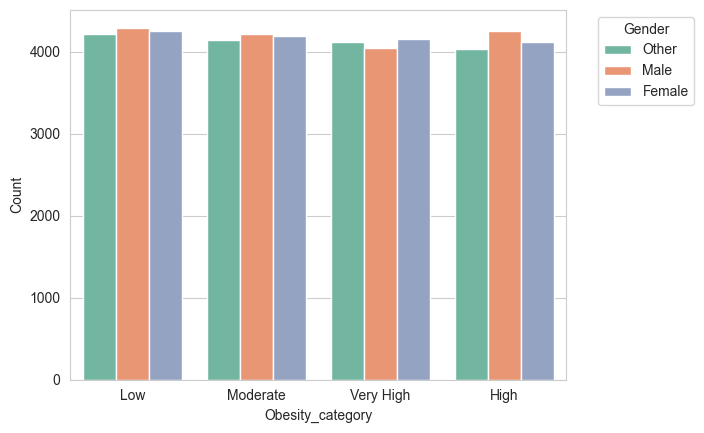

In [164]:
sns.barplot(data = result , x = "Obesity_category", y = "Count" , hue = "Gender")
plt.legend(title="Gender", bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.show()

### Gender - Genetic Risk Level


In [165]:
result = patients_count(data , "Gender", "Genetic_Risk_Level")
result

,Gender,Genetic_Risk_Level,Count
0,Male,High Risk,4306
1,Male,Low Risk,4259
2,Female,Low Risk,4258
3,Female,High Risk,4237
4,Other,Low Risk,4221
5,Male,Moderate Risk,4202
6,Female,Moderate Risk,4172
7,Other,Moderate Risk,4100
8,Other,Very High Risk,4097
9,Other,High Risk,4077


In [166]:
pivot_df = result.pivot(index='Gender', columns='Genetic_Risk_Level', values='Count')
pivot_df

Genetic_Risk_Level,High Risk,Low Risk,Moderate Risk,Very High Risk
Gender,,,,
Female,4237,4258,4172,4042
Male,4306,4259,4202,4029
Other,4077,4221,4100,4097


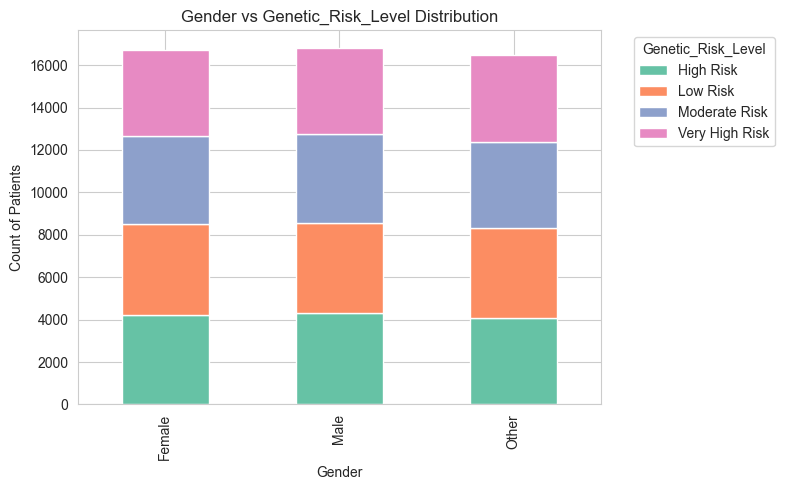

In [167]:
# Plot
pivot_df.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title("Gender vs Genetic_Risk_Level Distribution")
plt.xlabel("Gender")
plt.ylabel("Count of Patients")
plt.legend(title="Genetic_Risk_Level", bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout()
plt.show()


### Gender - Air_Pollution_Level

In [170]:
result = patients_count(data , "Gender", "Air_Pollution_Level")

In [171]:
pivot_df = result.pivot(index = "Gender", columns = "Air_Pollution_Level", values = "Count")
pivot_df

Air_Pollution_Level,High,Low,Moderate,Very High
Gender,,,,
Female,4108,4253,4193,4155
Male,4266,4223,4189,4118
Other,4137,4233,4118,4007


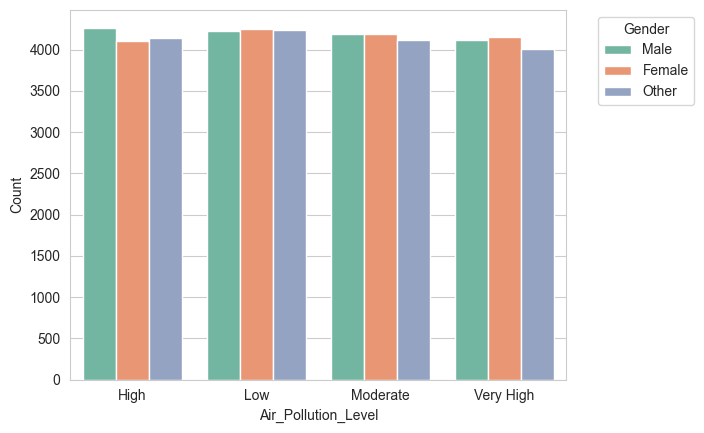

In [172]:
sns.barplot(data = result , x = "Air_Pollution_Level", y = "Count" , hue = "Gender")
plt.legend(title="Gender", bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.show()

### Gender - Year

In [177]:
result = patients_count(data , "Gender", "Year")
result.sort_values(by= ["Year","Count"], ascending=[True , False])

,Gender,Year,Count
9,Female,2015,1693
12,Other,2015,1675
22,Male,2015,1644
0,Female,2016,1737
4,Other,2016,1710
21,Male,2016,1647
1,Male,2017,1731
8,Female,2017,1694
24,Other,2017,1612
15,Female,2018,1672


In [185]:
pivot_df = result.pivot(index = "Year", columns = "Gender", values = "Count")
pivot_df

Gender,Female,Male,Other
Year,,,
2015,1693,1644,1675
2016,1737,1647,1710
2017,1694,1731,1612
2018,1672,1662,1602
2019,1673,1721,1671
2020,1682,1700,1697
2021,1569,1723,1675
2022,1640,1656,1585
2023,1659,1607,1669


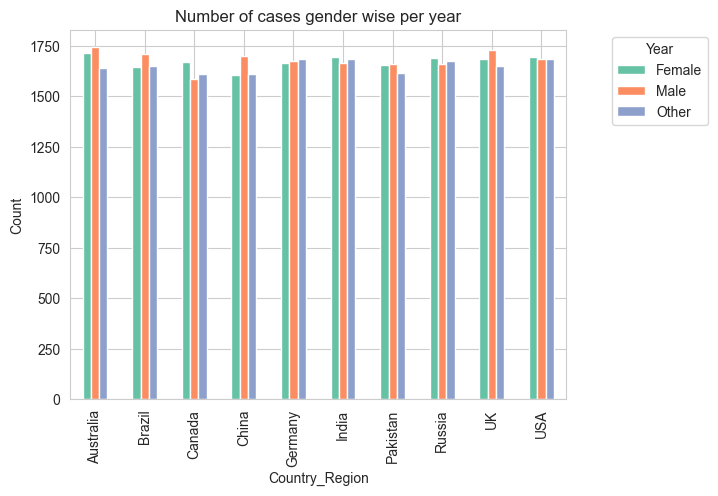

In [201]:
pivot_df.plot(kind = "bar")
plt.legend(title = "Year", bbox_to_anchor = (1.3,1), loc = "upper right")
plt.title("Number of cases gender wise per year")
plt.ylabel("Count")
plt.show()

### Gender - Country_Region 

In [195]:
result = patients_count(data , "Gender", "Country_Region").sort_values(by= ["Country_Region" , "Count"], ascending = [True , False])
result

,Gender,Country_Region,Count
0,Male,Australia,1741
2,Female,Australia,1713
24,Other,Australia,1638
3,Male,Brazil,1708
21,Other,Brazil,1651
23,Female,Brazil,1645
15,Female,Canada,1667
26,Other,Canada,1612
29,Male,Canada,1585
4,Male,China,1698


In [198]:
pivot_df=  result.pivot(index = "Country_Region", columns = "Gender", values = "Count")
pivot_df

Gender,Female,Male,Other
Country_Region,,,
Australia,1713,1741,1638
Brazil,1645,1708,1651
Canada,1667,1585,1612
China,1607,1698,1608
Germany,1666,1675,1683
India,1693,1664,1683
Pakistan,1652,1658,1616
Russia,1688,1657,1672
UK,1684,1727,1649


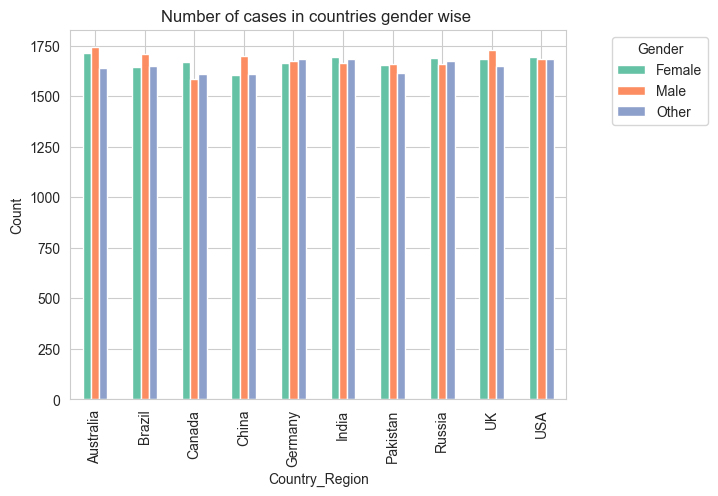

In [200]:
pivot_df.plot(kind = "bar")
plt.legend(title = "Gender", bbox_to_anchor = (1.3,1), loc = "upper right")
plt.title("Number of cases in countries gender wise ")
plt.ylabel("Count")
plt.show()

### Gender -  Cancer stage

In [207]:
result = patients_count(data, "Gender", "Cancer_Stage").sort_values(by = ["Gender", "Count"], ascending = [True , False] )
result

,Gender,Cancer_Stage,Count
2,Female,Stage II,3375
6,Female,Stage 0,3354
7,Female,Stage I,3353
8,Female,Stage IV,3338
11,Female,Stage III,3289
0,Male,Stage II,3421
1,Male,Stage I,3384
3,Male,Stage IV,3370
5,Male,Stage III,3355
13,Male,Stage 0,3266


In [208]:
pivot_df = result.pivot(index = "Cancer_Stage", columns = "Gender", values = "Count" )
pivot_df

Gender,Female,Male,Other
Cancer_Stage,,,
Stage 0,3354,3266,3269
Stage I,3353,3384,3309
Stage II,3375,3421,3328
Stage III,3289,3355,3364
Stage IV,3338,3370,3225


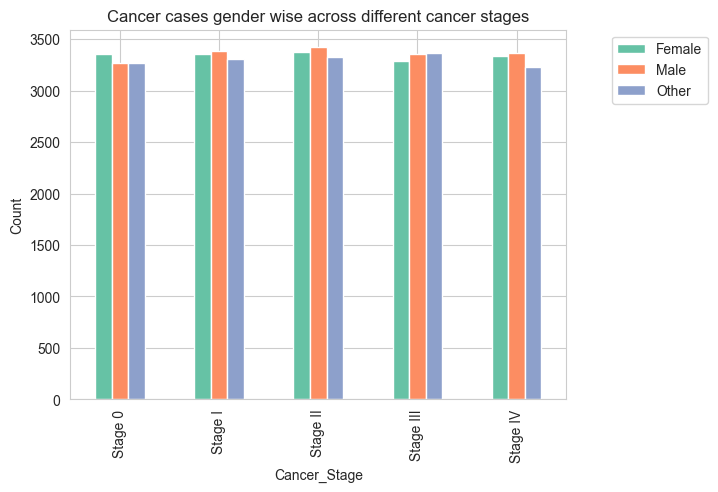

In [212]:
pivot_df.plot(kind = "bar")
plt.title("Cancer cases gender wise across different cancer stages")
plt.ylabel("Count")
plt.legend(bbox_to_anchor = (1.3,1))
plt.show()

### Gender - Treatment_Cost_USD

In [234]:
avg_cost = pd.read_sql_query("select Gender , avg(Treatment_Cost_USD) as total_cost from cancer_data group by Gender order by total_cost desc",conn)
avg_cost

,Gender,total_cost
0,Other,52749.224323
1,Male,52564.402015
2,Female,52091.373540


In [235]:
min_cost = pd.read_sql_query("select Gender , min(Treatment_Cost_USD) as total_cost from cancer_data group by Gender order by total_cost desc",conn)
min_cost

,Gender,total_cost
0,Female,5006.49
1,Other,5005.76
2,Male,5000.05


In [236]:
max_cost = pd.read_sql_query("select Gender , max(Treatment_Cost_USD) as total_cost from cancer_data group by Gender order by total_cost desc",conn)
max_cost

,Gender,total_cost
0,Male,99999.84
1,Female,99998.28
2,Other,99997.71


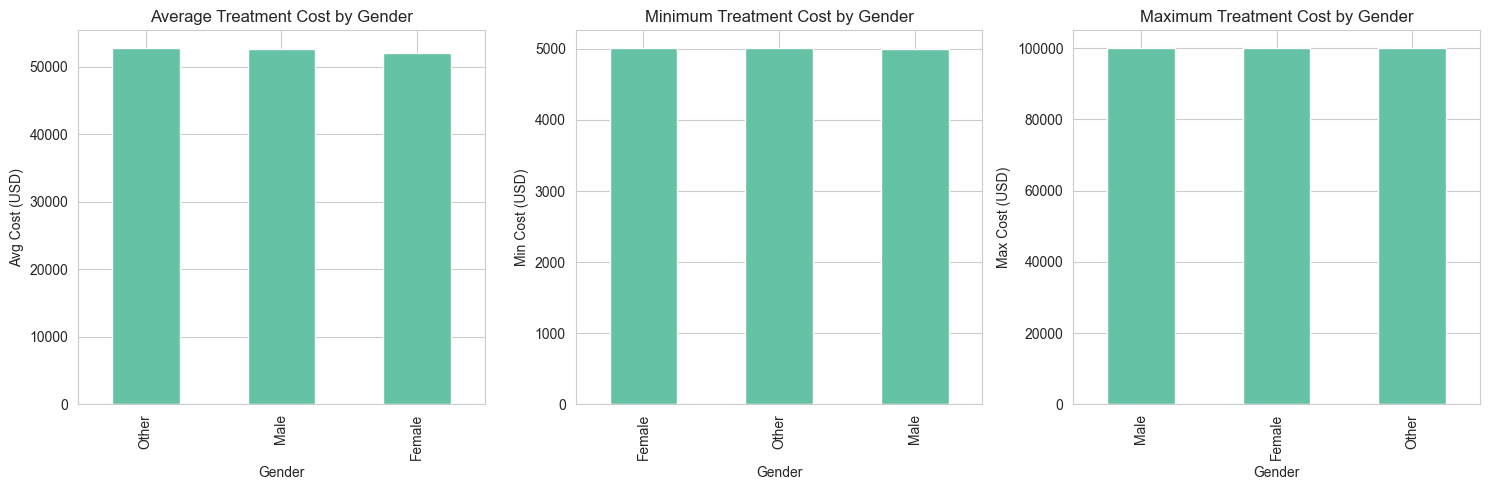

In [238]:

fig, axes = plt.subplots(1, 3, figsize=(15,5))   # create 3 subplots in one row

# Mean
avg_cost.plot(kind='bar', x='Gender', y='total_cost', legend=False, ax=axes[0])
axes[0].set_title("Average Treatment Cost by Gender")
axes[0].set_ylabel("Avg Cost (USD)")

# Minimum
min_cost.plot(kind='bar', x='Gender', y='total_cost', legend=False, ax=axes[1])
axes[1].set_title("Minimum Treatment Cost by Gender")
axes[1].set_ylabel("Min Cost (USD)")

# Maximum
max_cost.plot(kind='bar', x='Gender', y='total_cost', legend=False, ax=axes[2])
axes[2].set_title("Maximum Treatment Cost by Gender")
axes[2].set_ylabel("Max Cost (USD)")

plt.tight_layout()
plt.show()


### Gender - Survival years

In [261]:
result = pd.read_sql_query("select Gender, avg(Survival_Years) as avg_survival_years from cancer_data group by Gender",conn)
result

,Gender,avg_survival_years
0,Female,5.033515
1,Male,5.002447
2,Other,4.983146


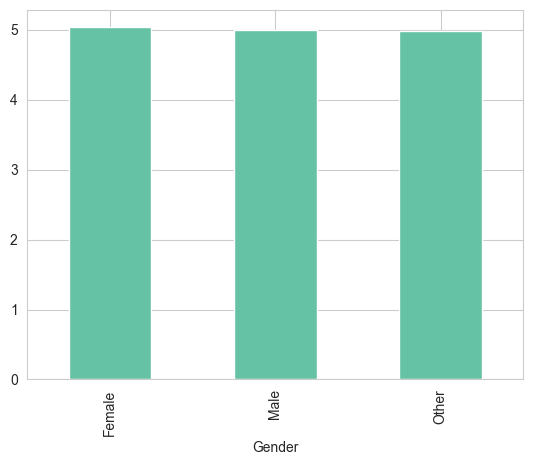

In [262]:
result.plot(kind = "bar", x = "Gender", y = "avg_survival_years", legend = False)
plt.show()

### Gender - Target_Severity_Score

In [263]:
result = pd.read_sql_query("select Gender, max(Target_Severity_Score) as avg_Target_Severity_Score from cancer_data group by Gender",conn)
result

,Gender,avg_Target_Severity_Score
0,Female,8.77
1,Male,8.86
2,Other,9.16


In [264]:
pd.read_sql_query("select Gender, avg(Target_Severity_Score) as avg_Target_Severity_Score from cancer_data group by Gender",conn)

,Gender,avg_Target_Severity_Score
0,Female,4.961306
1,Male,4.944539
2,Other,4.947768


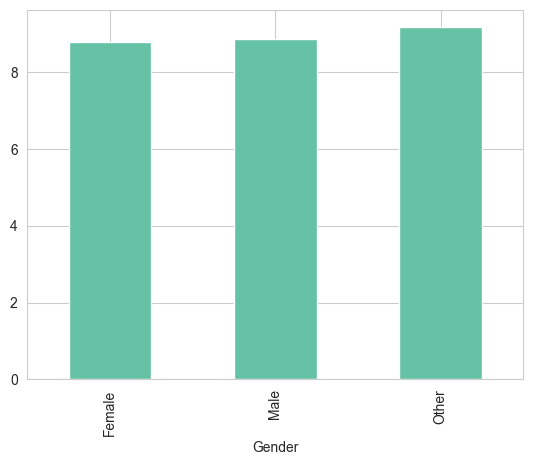

In [265]:
result.plot(kind = "bar", x = "Gender", y = "avg_Target_Severity_Score", legend = False)

plt.show()

### Gender - Age bin

In [268]:
result = patients_count(data , "Gender", "Age_Bin")
result

,Gender,Age_Bin,Count
0,Female,Young_adult,5138
1,Other,Young_adult,4999
2,Male,Young_adult,4992
3,Male,Middle Age (41-60),4843
4,Female,Middle Age (41-60),4711
5,Other,Middle Age (41-60),4608
6,Male,Senior (61-75),3661
7,Female,Senior (61-75),3531
8,Other,Senior (61-75),3503
9,Other,Elderly (> 75),3385


In [270]:
pivot_df = result.pivot(index = "Gender" , columns = "Age_Bin", values = "Count")
pivot_df

Age_Bin,Elderly (> 75),Middle Age (41-60),Senior (61-75),Young_adult
Gender,,,,
Female,3329,4711,3531,5138
Male,3300,4843,3661,4992
Other,3385,4608,3503,4999


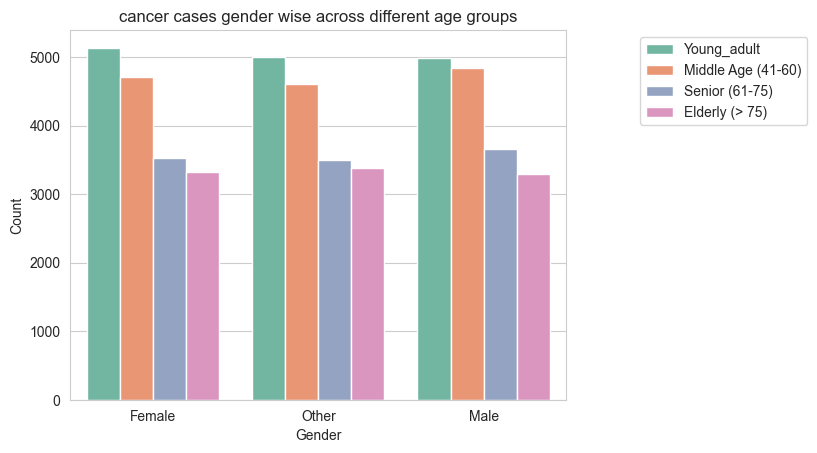

In [276]:
sns.barplot(data = result , x = "Gender", y = "Count", hue = "Age_Bin")
plt.legend(bbox_to_anchor = (1.5, 1) )
plt.title("cancer cases gender wise across different age groups")
plt.show()

### Year - Country region

In [285]:
result = patients_count(data , "Year", "Country_Region")

,Year,Country_Region,Count
0,2023,Australia,554
1,2017,China,535
2,2020,Australia,535
3,2016,USA,533
4,2016,China,533
...,...,...,...
95,2022,China,460
96,2024,China,451
97,2018,Pakistan,451
98,2021,China,444


In [286]:
result.pivot(index = "Year", columns = "Country_Region" , values = "Count")

Country_Region,Australia,Brazil,Canada,China,Germany,India,Pakistan,Russia,UK,USA
Year,,,,,,,,,,
2015,515,499,511,529,473,515,460,512,490,508
2016,516,525,478,533,503,508,506,493,499,533
2017,484,508,481,535,512,507,499,524,493,494
2018,492,504,489,474,517,477,451,501,524,507
2019,525,496,490,477,519,504,500,515,522,517
2020,535,485,502,514,478,532,501,507,525,500
2021,472,492,501,444,484,519,517,504,513,521
2022,513,506,487,460,507,470,481,492,497,468
2023,554,491,437,496,503,505,490,473,488,498


In [288]:
# year wise top countries with most cancer cases

temp = patients_count(data , "Year", "Country_Region").sort_values(by = ["Year","Count"]).drop_duplicates(subset = ["Year"])
temp

,Year,Country_Region,Count
94,2015,Pakistan,460
84,2016,Canada,478
83,2017,Canada,481
97,2018,Pakistan,451
87,2019,China,477
85,2020,Germany,478
98,2021,China,444
95,2022,China,460
99,2023,Canada,437
96,2024,China,451


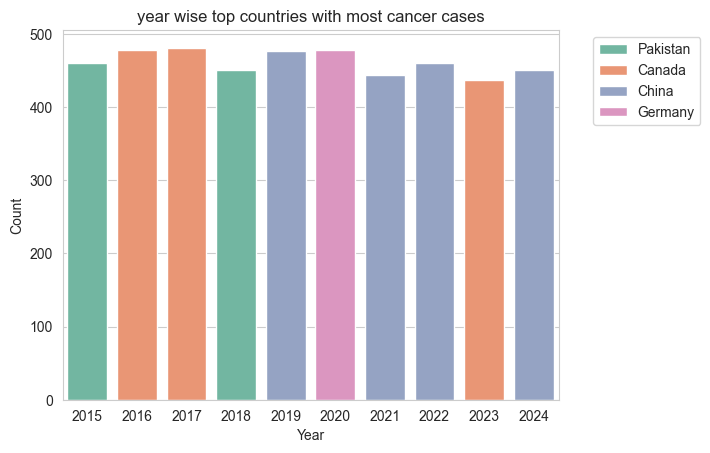

In [292]:
sns.barplot(data = temp , x = "Year", y = "Count", hue = "Country_Region")
plt.legend(bbox_to_anchor = (1.3,1))
plt.title("year wise top countries with most cancer cases")
plt.show()

In [297]:
# India Scenario

result = pd.read_sql_query("select Year, count(*) as count from cancer_data where Country_Region = 'India'group by Year",conn)
result

,Year,count
0,2015,515
1,2016,508
2,2017,507
3,2018,477
4,2019,504
5,2020,532
6,2021,519
7,2022,470
8,2023,505
9,2024,503


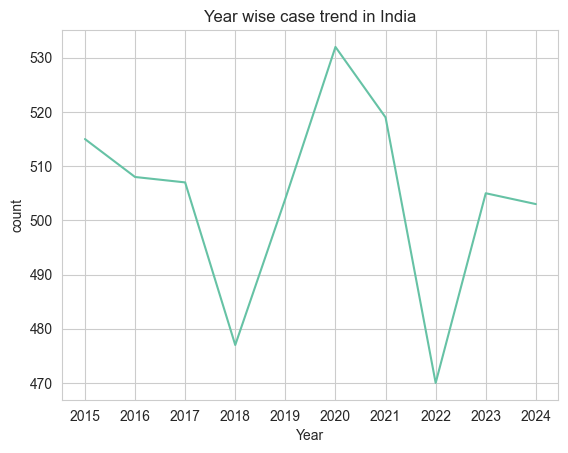

In [301]:
sns.lineplot(data = result , x = "Year", y = "count")
plt.title("Year wise case trend in India")
plt.xticks(result["Year"].unique())
plt.show()

### Year - Age bin

In [313]:
result = patients_count(data, "Year", "Age_Bin").sort_values(by= ["Year","Count"], ascending = [True,False])
result.reset_index()

,index,Year,Age_Bin,Count
0,6,2015,Young_adult,1504
1,18,2015,Middle Age (41-60),1379
2,21,2015,Senior (61-75),1097
3,28,2015,Elderly (> 75),1032
4,4,2016,Young_adult,1524
5,10,2016,Middle Age (41-60),1473
6,23,2016,Senior (61-75),1090
7,34,2016,Elderly (> 75),1007
8,0,2017,Young_adult,1542
9,15,2017,Middle Age (41-60),1406


In [312]:
# age group with highest cases year wise 
result.drop_duplicates(subset = ["Year"]).reset_index()

,index,Year,Age_Bin,Count
0,6,2015,Young_adult,1504
1,4,2016,Young_adult,1524
2,0,2017,Young_adult,1542
3,8,2018,Young_adult,1479
4,1,2019,Young_adult,1533
5,3,2020,Young_adult,1528
6,5,2021,Young_adult,1521
7,12,2022,Young_adult,1470
8,7,2023,Young_adult,1498
9,2,2024,Young_adult,1530


In [311]:
pivot_df = result.pivot(index = "Year", columns = "Age_Bin", values = "Count")
pivot_df

Age_Bin,Elderly (> 75),Middle Age (41-60),Senior (61-75),Young_adult
Year,,,,
2015,1032,1379,1097,1504
2016,1007,1473,1090,1524
2017,993,1406,1096,1542
2018,1029,1403,1025,1479
2019,988,1472,1072,1533
2020,1018,1428,1105,1528
2021,962,1475,1009,1521
2022,1014,1315,1082,1470
2023,1000,1402,1035,1498


In [339]:
## case trend among young adults
young = pd.read_sql_query("select Year, count(*) as count from cancer_data where Age_Bin = 'Young_adult' group by Year ",conn)
young

,Year,count
0,2015,1504
1,2016,1524
2,2017,1542
3,2018,1479
4,2019,1533
5,2020,1528
6,2021,1521
7,2022,1470
8,2023,1498
9,2024,1530


In [341]:
## case trend among middle age (41-60) 
mid_age=  pd.read_sql_query("select Year, count(*) as count from cancer_data where Age_Bin = 'Middle Age (41-60)' group by Year ",conn)
mid_age

,Year,count
0,2015,1379
1,2016,1473
2,2017,1406
3,2018,1403
4,2019,1472
5,2020,1428
6,2021,1475
7,2022,1315
8,2023,1402
9,2024,1409


In [345]:
Senior =  pd.read_sql_query("select Year, count(*) as count from cancer_data where Age_Bin = 'Senior (61-75)' group by Year ",conn)
Senior

,Year,count
0,2015,1097
1,2016,1090
2,2017,1096
3,2018,1025
4,2019,1072
5,2020,1105
6,2021,1009
7,2022,1082
8,2023,1035
9,2024,1084


In [346]:
Elderly =  pd.read_sql_query("select Year, count(*) as count from cancer_data where Age_Bin = 'Elderly (> 75)' group by Year ",conn)
Elderly 

,Year,count
0,2015,1032
1,2016,1007
2,2017,993
3,2018,1029
4,2019,988
5,2020,1018
6,2021,962
7,2022,1014
8,2023,1000
9,2024,971


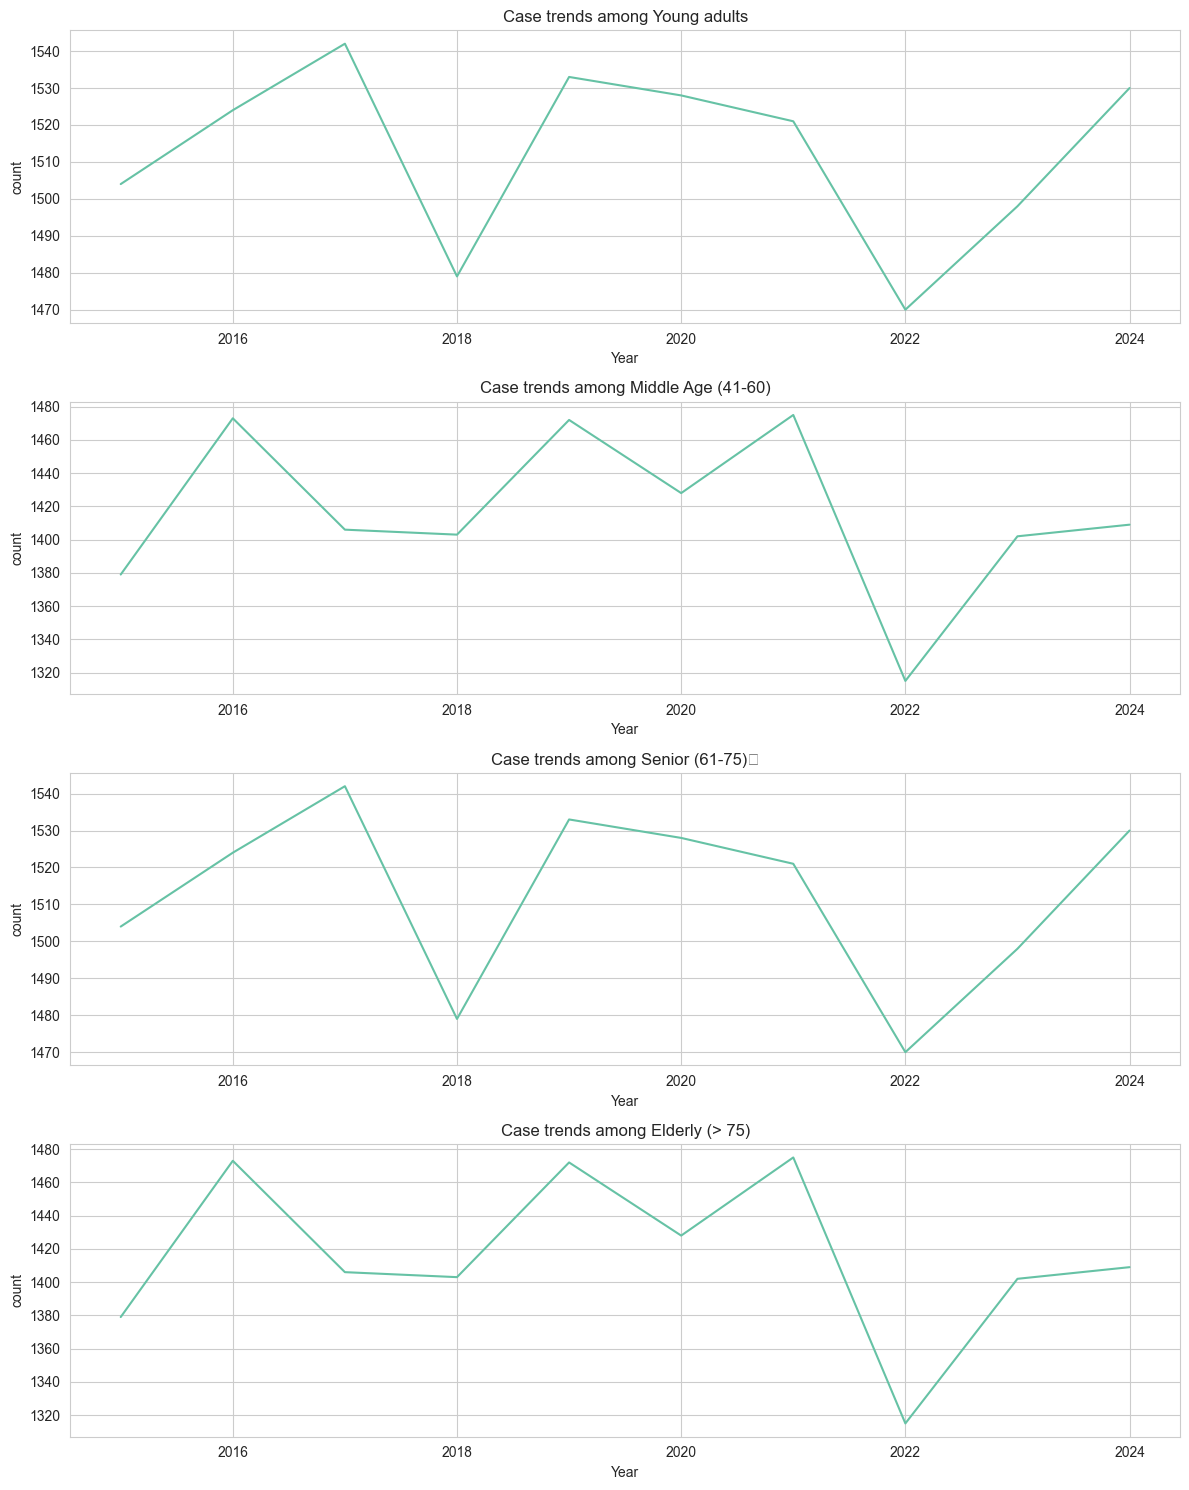

In [349]:
fig , ax = plt.subplots(4,1, figsize = (12,15))

sns.lineplot(young , x = "Year", y = "count", ax = ax[0])
ax[0].set_title("Case trends among Young adults")
sns.lineplot(mid_age , x = "Year", y = "count", ax = ax[1])
ax[1].set_title("Case trends among Middle Age (41-60)")
sns.lineplot(young , x = "Year", y = "count", ax = ax[2])
ax[2].set_title("Case trends among Senior (61-75)	")
sns.lineplot(mid_age , x = "Year", y = "count", ax = ax[3])
ax[3].set_title("Case trends among Elderly (> 75)")

plt.xlabel("Year")
plt.tight_layout()
plt.show()


###  Year - Genetic_Risk_Level

In [352]:
pivot_df = patients_count(data , "Year", "Genetic_Risk_Level").pivot(index = "Year", columns = "Genetic_Risk_Level", values = "Count")

Genetic_Risk_Level,High Risk,Low Risk,Moderate Risk,Very High Risk
Year,,,,
2015,1308,1274,1233,1197
2016,1270,1314,1344,1166
2017,1305,1262,1262,1208
2018,1288,1263,1229,1156
2019,1210,1336,1259,1260
2020,1301,1312,1217,1249
2021,1209,1271,1261,1226
2022,1208,1220,1232,1221
2023,1233,1227,1230,1245


In [357]:
## Yearly genetic risk level trend

result = pd.read_sql_query("""
                            select Year ,Genetic_Risk_Level, count(*) as count 
                            from cancer_data 
                            group by Year ,Genetic_Risk_Level 
                            order by count Desc  """,conn)
result

,Year,Genetic_Risk_Level,count
0,2016,Moderate Risk,1344
1,2019,Low Risk,1336
2,2016,Low Risk,1314
3,2020,Low Risk,1312
4,2015,High Risk,1308
5,2017,High Risk,1305
6,2020,High Risk,1301
7,2018,High Risk,1288
8,2024,High Risk,1288
9,2015,Low Risk,1274
